# Capstone Project | Battle of the Neighbourhoods
-----------
## Seattle's Housing Market & Airbnb
_By Konstantina Vasileva_ | _See blog post on [Medium](https://medium.com/@Konstantinna/a-tale-of-two-pacific-cities-exploring-the-effects-of-airbnb-listings-on-the-rental-market-e4c806f65ebb)_


<img src="https://images.unsplash.com/photo-1516156008625-3a9d6067fab5?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80">

## Table of contents
* [Introduction](#Introduction)
* [Data](#Data)
* [Methodology & Data Analysis](#Methodology)
* [Results and Discussion](#Results)
* [Conclusion](#Conclusion)




# Introduction
### Background
Seattle has changed significantly after Amazon moved into its South Lake Union headquarters in 2010. Prices and rents skyrocketed, sending the city into a housing downward spiral. This trend is starting to shift and taper off in the past two years due to a surge in new property building and slow-down in rent growth. Nevertheless, housing remains an issue. A combination of factors shapes the state of the housing market in Seattle and other big cities across the world: starting from land availability (constrained by geography and urban planning), housing subsidies and taxes; increasingly exorbitant rent market prices, housing supply, mortgage interest rates, construction costs, as well as internal and international migration. Supply is also increasingly affected by demand by foreign investors and private buyers (primarily from China). Last but not least, the growth of services like Airbnb affect supply by taking entire properties off the conventional rental market.

###  Problem 
Renting a place to live in major developed cities like Seattle is increasingly difficult. It is out of the scope of this capstone project to analyse all variables affecting rental prices, so at this first stage, I will focus on claims that Airbnb listings exacerbate the housing crisis by "squandering precious long-term rental housing stock".  There has not been a proper look comparing entire place listings (which do take properties out of the long-term rental market) and single room listings which people rent out on Airbnb to supplement their income while they still live on the property. 
A higher number of listings corresponding to higher rental prices in a neighbourhood might be due to other factors beside supply shortage. For example, investors and private owners of properties in expensive neighbourhoods might be more tempted to list one or more of them on Airbnb. It is interesting to check whether single room vs entire place Airbnb clusters would correspond to different rental price clusters across neighbourhoods.

### Interest
Housing issues and soaring rental prices are increasingly becoming a problem across developed cities around the world. Open data projects and data insights on the topic can be used to inform public policy or generate productive debate on the topic.


# Data
##  Sources, Acquisition & Cleaning


* Airbnb & GeoData: [Inside Airbnb](http://insideairbnb.com/get-the-data.html) is an independent, non-commercial Open Source data tool which provides Airbnb listings data to the public. I used it to download a .csv with current Airbnb listings in Seattle (updated in September 2019).  __It also features geo coordinates and neighbourhoods__, which I supplemented with a [geojson file from SeattleIO on github](https://github.com/seattleio/seattle-boundaries-data/blob/master/data/neighborhoods.geojson).
* Rental data: collected from [RentCafe](https://www.rentcafe.com/average-rent-market-trends/us/wa/seattle/)

In [200]:
# Step 1 | Loading the key libraries
import pandas as pd
import pylab as pl
import numpy as np


In [201]:
!wget -O airbnb.csv https://raw.githubusercontent.com/Konstantinna/Coursera_Capstone/master/airbnb_seattle.csv
!wget -O rent.csv https://raw.githubusercontent.com/Konstantinna/Coursera_Capstone/master/rent_seattle.csv


--2019-11-09 07:19:47--  https://raw.githubusercontent.com/Konstantinna/Coursera_Capstone/master/airbnb_seattle.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1411760 (1.3M) [text/plain]
Saving to: ‘airbnb.csv’

100%[======================================>] 1,411,760   --.-K/s   in 0.07s   

2019-11-09 07:19:47 (20.7 MB/s) - ‘airbnb.csv’ saved [1411760/1411760]

--2019-11-09 07:19:48--  https://raw.githubusercontent.com/Konstantinna/Coursera_Capstone/master/rent_seattle.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2178 (2.1K) [text/plain]
Saving to: ‘rent.csv’

100%[=====================================

In [202]:
df = pd.read_csv('airbnb.csv')

for col in df.columns: 
    print(col)

df.head()

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
entire
room
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,entire,room,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61082,-122.29082,Entire home/apt,1.0,NaN,296,30,28,30/08/2019,0.21,2,84
1,5682,"Cozy Studio, min. to downtown -WiFi",8993,Maddy,Delridge,South Delridge,47.52398,-122.35989,Entire home/apt,1.0,NaN,48,3,462,24/11/2018,3.99,1,0
2,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65411,-122.33761,Entire home/apt,1.0,NaN,90,2,147,7/09/2019,1.19,3,85
3,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55062,-122.32014,Private room,NaN,1.0,62,2,144,2/09/2019,1.29,8,365
4,9460,Downtown Convention Center B&B -- Free Minibar,30832,Siena,Downtown,First Hill,47.61265,-122.32936,Private room,NaN,1.0,99,3,443,2/09/2019,3.62,4,150


In [203]:
df_rent = pd.read_csv('rent.csv')
df_rent.head()

,Neighborhood,AVGrent
0,The Highlands,1295
1,Richmond Beach,1295
2,Innis Arden,1295
3,Rainier View,1379
4,Zenith,1466


In [204]:
# download Seattle neighbourhoods geojson file
!wget --quiet https://github.com/seattleio/seattle-boundaries-data/raw/master/data/neighborhoods.geojson
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


###  Data Cleaning  & Feature Selection

Since the rent database has a slightly different spelling of columns I had to rename the Neighborhood column, so that I could better append data to the airbnb listings. The Airbnb data included features which are not relevant to the current analysis, so I had to drop the columns (listing) name, host_name, minimum_nights, number_of_reviews, last_review, reviews_per_month and availability_365. 



In [205]:
df_rent.rename(columns={"Neighborhood":"neighbourhood"}, inplace = True)
df_rent.head()

,neighbourhood,AVGrent
0,The Highlands,1295
1,Richmond Beach,1295
2,Innis Arden,1295
3,Rainier View,1379
4,Zenith,1466


The remaining features neighbourhood_group, neighbourhood, latitude, longitude, room_type and price are directly relevant to analysing whether entire place or single room listings are clustered in neighbourhoods with higher rental prices. What is more, the columns Host_id and calculated_host_listings_count indicate property owners with multiple listed properties: a variable related to the notion that the relationship between Airbnb listings and neighbourhood prices going up goes two ways (and owners with higher income and more properties are likely list property in neighbourhoods where they can get more money out of them).

Cleaning the dataframe and __removing columns with data which is not relevant for the current analysis__

In [206]:
df = pd.DataFrame(df, columns=['id','neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type','entire','room','price', 'host_id', 'calculated_host_listings_count'])
df.drop(df.index[0],inplace=True)

df.head()

#Optional code for cleaning Missing data (this database does not have missing values)
#clean = df[df['name'] == 'Not assigned'].index
#df.drop(clean, inplace= True)

#Optional grouping
#df_grouped = df.groupby('neighbourhood_group').agg({'neighbourhood': ','.join}).reset_index()
#df_grouped.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,entire,room,price,host_id,calculated_host_listings_count
1,5682,Delridge,South Delridge,47.52398,-122.35989,Entire home/apt,1.0,NaN,48,8993,1
2,6606,Other neighborhoods,Wallingford,47.65411,-122.33761,Entire home/apt,1.0,NaN,90,14942,3
3,9419,Other neighborhoods,Georgetown,47.55062,-122.32014,Private room,NaN,1.0,62,30559,8
4,9460,Downtown,First Hill,47.61265,-122.32936,Private room,NaN,1.0,99,30832,4
5,9531,West Seattle,Fairmount Park,47.55539,-122.38474,Entire home/apt,1.0,NaN,165,31481,2


In [207]:
# Removing Hotel & Shared rooms
indexNames = df[ df['room_type'] == 'Hotel room' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames, inplace=True)


In [208]:
for col in df.columns: 
    print(col)
    
df.shape

id
neighbourhood_group
neighbourhood
latitude
longitude
room_type
entire
room
price
host_id
calculated_host_listings_count


(8882, 11)

### I need to further clean up the data as I want to analyse only neighbourhoods for which I know the latest average rental price. I also want a cleaned list grouped by neighbourhood in addition to my full list by listing item.

In [209]:
#Merge rent data and the trest
df = pd.merge(df_rent, df, how ='inner', on ='neighbourhood') 
df.head()

,neighbourhood,AVGrent,id,neighbourhood_group,latitude,longitude,room_type,entire,room,price,host_id,calculated_host_listings_count
0,Rainier View,1379,5139005,Rainier Valley,47.49882,-122.26795,Entire home/apt,1.0,NaN,49,26513643,1
1,Rainier View,1379,11082101,Rainier Valley,47.50383,-122.26557,Entire home/apt,1.0,NaN,87,4397344,1
2,Rainier View,1379,12041382,Rainier Valley,47.50141,-122.24257,Private room,NaN,1.0,45,64462222,1
3,Rainier View,1379,12913085,Rainier Valley,47.50479,-122.26628,Entire home/apt,1.0,NaN,90,8936770,1
4,Rainier View,1379,13379691,Rainier Valley,47.50817,-122.24728,Entire home/apt,1.0,NaN,220,76040779,1


In [210]:
#Making syre there are only entries containing AVGrent data
indexrent = df[df['AVGrent'] == 0 ].index
df.drop(indexrent, inplace=True)
df.head()

,neighbourhood,AVGrent,id,neighbourhood_group,latitude,longitude,room_type,entire,room,price,host_id,calculated_host_listings_count
0,Rainier View,1379,5139005,Rainier Valley,47.49882,-122.26795,Entire home/apt,1.0,NaN,49,26513643,1
1,Rainier View,1379,11082101,Rainier Valley,47.50383,-122.26557,Entire home/apt,1.0,NaN,87,4397344,1
2,Rainier View,1379,12041382,Rainier Valley,47.50141,-122.24257,Private room,NaN,1.0,45,64462222,1
3,Rainier View,1379,12913085,Rainier Valley,47.50479,-122.26628,Entire home/apt,1.0,NaN,90,8936770,1
4,Rainier View,1379,13379691,Rainier Valley,47.50817,-122.24728,Entire home/apt,1.0,NaN,220,76040779,1


In [211]:
#df.head()

In [212]:
seattle_meanprice = df.groupby('neighbourhood').mean().reset_index()
seattle_meanprice = pd.DataFrame(seattle_meanprice, columns=['neighbourhood', 'price', 'calculated_host_listings_count','latitude','longitude'])
seattle_meanprice.rename(columns={'price':'AVGprice','calculated_host_listings_count':'AVGhostlist'}, inplace=True)

seattle_meanprice.head()

,neighbourhood,AVGprice,AVGhostlist,latitude,longitude
0,Alki,162.301887,6.603774,47.575039,-122.407001
1,Arbor Heights,108.818182,5.363636,47.510350,-122.380018
2,Atlantic,123.856000,6.784000,47.595060,-122.304350
3,Belltown,222.897384,71.211268,47.615155,-122.346219
4,Bitter Lake,99.414634,3.658537,47.718962,-122.351623


In [213]:
seattle_hosts = df.groupby('neighbourhood').nunique()
seattle_hosts = seattle_hosts[['id','host_id']]

#rename host_id count to number of hosts in this neighbourhood
seattle_hosts.rename(columns={'id':'listings','host_id':'host_num'}, inplace=True)
seattle_hosts.reset_index(inplace=True)
seattle_hosts.head()


,neighbourhood,listings,host_num
0,Alki,106,82
1,Arbor Heights,22,21
2,Atlantic,125,98
3,Belltown,497,190
4,Bitter Lake,41,35


In [214]:
#Merge hosts and mean price data
dfneigh = pd.merge(seattle_meanprice, seattle_hosts, how ='inner', on ='neighbourhood') 
dfneigh.rename(columns={'price':'AVGprice','calculated_host_listings_count':'AVGlist'}, inplace=True)
dfneigh.head()

,neighbourhood,AVGprice,AVGhostlist,latitude,longitude,listings,host_num
0,Alki,162.301887,6.603774,47.575039,-122.407001,106,82
1,Arbor Heights,108.818182,5.363636,47.510350,-122.380018,22,21
2,Atlantic,123.856000,6.784000,47.595060,-122.304350,125,98
3,Belltown,222.897384,71.211268,47.615155,-122.346219,497,190
4,Bitter Lake,99.414634,3.658537,47.718962,-122.351623,41,35


In [215]:
#Group features back together and sort by neighbourhood
seattle_rooms = df.groupby('neighbourhood').count().reset_index()
seattle_rooms = pd.DataFrame(seattle_rooms, columns=['neighbourhood','entire','room'])

In [216]:
#Merge hosts and mean price data
dfneigh = pd.merge(seattle_rooms, dfneigh, how ='inner', on ='neighbourhood') 
dfneigh.head()

,neighbourhood,entire,room,AVGprice,AVGhostlist,latitude,longitude,listings,host_num
0,Alki,95,11,162.301887,6.603774,47.575039,-122.407001,106,82
1,Arbor Heights,19,3,108.818182,5.363636,47.510350,-122.380018,22,21
2,Atlantic,80,45,123.856000,6.784000,47.595060,-122.304350,125,98
3,Belltown,481,16,222.897384,71.211268,47.615155,-122.346219,497,190
4,Bitter Lake,25,16,99.414634,3.658537,47.718962,-122.351623,41,35


In [217]:
dff = pd.merge(df_rent, dfneigh, how ='inner', on ='neighbourhood') 
dff.head()

,neighbourhood,AVGrent,entire,room,AVGprice,AVGhostlist,latitude,longitude,listings,host_num
0,Rainier View,1379,13,9,108.409091,6.227273,47.501127,-122.260339,22,18
1,South Park,1509,9,6,91.666667,10.733333,47.526723,-122.323792,15,15
2,Georgetown,1509,18,13,179.193548,7.612903,47.546307,-122.321056,31,23
3,Broadview,1574,22,18,102.000000,3.675000,47.718285,-122.359412,40,34
4,Bitter Lake,1599,25,16,99.414634,3.658537,47.718962,-122.351623,41,35


#### We now have data on the numnber of entire place and single room listings per neighbourhood, as well as the average listing price of listings in this neighbourhood, the average number of host listingsrage rent, listing pricetimately, there is rental data for 81 out of 88 neighbourhoods in the Airbnb listing database for Seattle.

### Geo Data | Map of Seattle

To map the analysed data we will first need a Folium map of the city, based on Geographic coordinates

In [218]:
#Conda Folium Install
#!conda install -c conda-forge folium=0.5.0 --yes 
#import folium # map rendering library

#pip alternative install
!pip install folium
import folium
import os

#PLUGINS
import folium.plugins as plugins
#from folium.plugins import MeasureControl
#from folium.plugins import FloatImage
#import datetime

print('Libraries imported.')

Libraries imported.


In [219]:
#Seattle coordinates
latitude = 47.6062
longitude = -122.335167

# The datafile is too big so to load the map more easily I will use a 1K sample to display
df_sample = df.sample(1000)

Using a geojson file, we can map the geo coordinates of listings on the map of Seattle.

In [220]:
seattle_geo = r'neighborhoods.geojson' # geojson file

from folium import plugins
airbnb = folium.Map(location = [latitude, longitude], zoom_start = 14)
for lat, lng, label in zip(df_sample.latitude, df_sample.longitude,df_sample.room_type):
    airbnb.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='pink',
            fill=True,
            fill_color='green',
            fill_opacity=0.6
        )
    )

tile = folium.TileLayer('cartodbpositron').add_to(airbnb)

airbnb

### Geo Data | Mapping Listings

Using the longitude and latitude data in the Airbnb listings database, I can map listings by room type, placing icons on the map markers

In [221]:
airbnb = folium.Map(location = [latitude, longitude], zoom_start = 12)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_sample.latitude, df_sample.longitude, df_sample.room_type):
    folium.Marker(
        location=[lat, lng],
        icon=folium.Icon(color='green', icon='home', prefix='fa'),
        popup=label,
        tooltip=folium.Tooltip,
    ).add_to(airbnb)
    
tile = folium.TileLayer('cartodbpositron').add_to(airbnb)
airbnb

# Methodology 
# & Data Analysis
### Exploratory Data Analysis (EDA)

First I looked at my data and visualised some of it to get an initial idea about the data through EDA. After this initial step was completed the planned analysis looked at several types of clustering techniques: KNN (supervised), CBSCAN (unsupervised) to see whether reliable clusters can be formed based on Airbnb listings characteristics and neighbourhood average rent prices.

#### Bar charts
Looking at listing numbers by neighbourhood group and type of room.

#### Histograms
Using a histogram of the number of the total number of listings per neighbourhood (plotting entire/room listings frequency) I got an initial idea about the distriubtion of the data.

#### Box plots
Box plot charts helped me gain a better idea of the variability in the distribution across the categories I was interested in.

#### Violin plots
Variaiton of box plots using the kernel density estimate to provide a richer description of the distribution. 

#### Scatterplots
Before running any regression analysis it is useful to look at the relationship between the sets of dependent and independent variables we are interested in through scatterplots

In [222]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

import itertools
from sklearn import preprocessing

import seaborn as sns
import numpy as np
import pylab as pl
%matplotlib inline

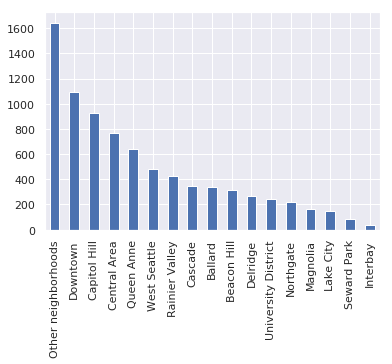

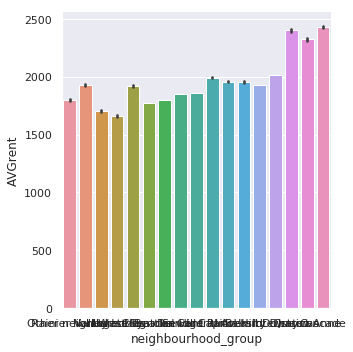

In [223]:
df.neighbourhood_group.value_counts().plot.bar()

sns.catplot(x="neighbourhood_group", y="AVGrent", kind="bar", data=df)



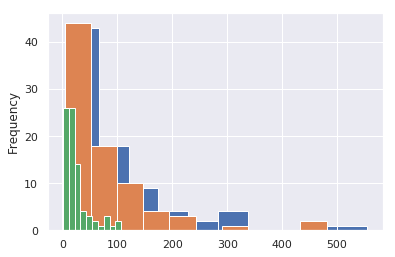

In [224]:
#Switching to seaborn graph style 
sns.set()
dff['listings'].plot(kind='hist')
dff['entire'].plot(kind='hist')
dff['room'].plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f790befa390>]],
      dtype=object)

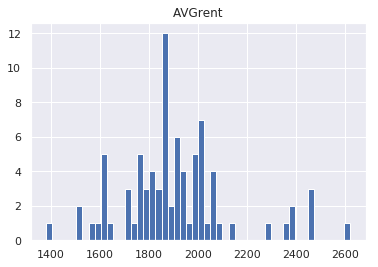

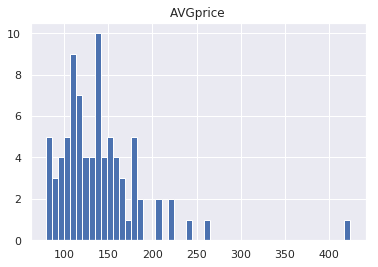

In [225]:
dff['AVGrent'].value_counts()
dff.hist(column='AVGrent', bins=50)

dff['AVGprice'].value_counts()
dff.hist(column='AVGprice', bins=50)

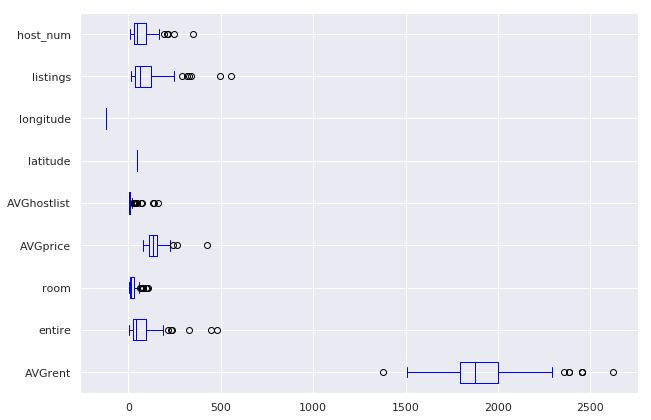

In [226]:
dff.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

entire         AxesSubplot(0.125,0.125;0.168478x0.755)
room        AxesSubplot(0.327174,0.125;0.168478x0.755)
AVGrent     AxesSubplot(0.529348,0.125;0.168478x0.755)
AVGprice    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

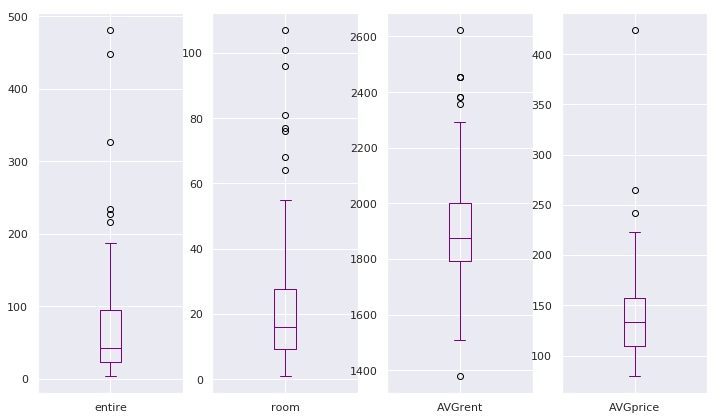

In [227]:
placeplot = dff[['entire','room','AVGrent','AVGprice']]
placeplot.plot(kind='box', figsize=(12, 7), color='purple', vert= True, subplots=True, layout=(1,4))


In [228]:
dff.head()

,neighbourhood,AVGrent,entire,room,AVGprice,AVGhostlist,latitude,longitude,listings,host_num
0,Rainier View,1379,13,9,108.409091,6.227273,47.501127,-122.260339,22,18
1,South Park,1509,9,6,91.666667,10.733333,47.526723,-122.323792,15,15
2,Georgetown,1509,18,13,179.193548,7.612903,47.546307,-122.321056,31,23
3,Broadview,1574,22,18,102.000000,3.675000,47.718285,-122.359412,40,34
4,Bitter Lake,1599,25,16,99.414634,3.658537,47.718962,-122.351623,41,35


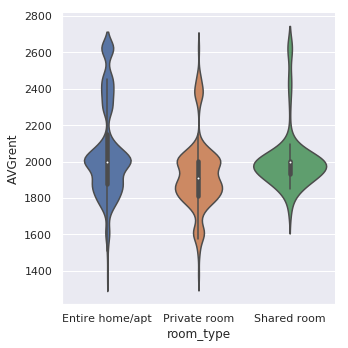

In [229]:
sns.catplot(x="room_type", y="AVGrent",  kind="violin", data=df);


Since I predicted a possible relationship between the different types of listings and the average rent in each neighbourhood, I built scatterplots looking at differents pairs of data (rent by type of room (entire/single) and by average listing price for the neighbourhood. The scatterplots below contain information about the Pearson r correlation test as well. There is a moderate correlation between the number of listings per neighbourhood and the average rent price (.51) and between entire place listings and average rent price (.53). As predicted, the correlation between entire place listings and rent is higher than the one between the number of single room listings and neighbourhood rent. 

#### Scatterplots
- categorical scatterplots
- beeswarm:  algorithm that can give a better representation of the distribution of observations, although it only works well for relatively small datasets

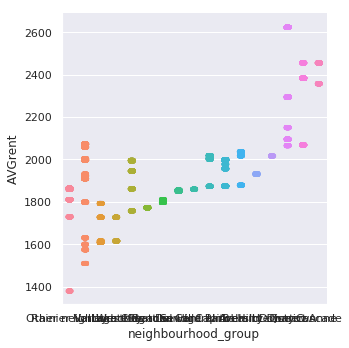

In [230]:
sns.catplot(x='neighbourhood_group', y='AVGrent', data=df)

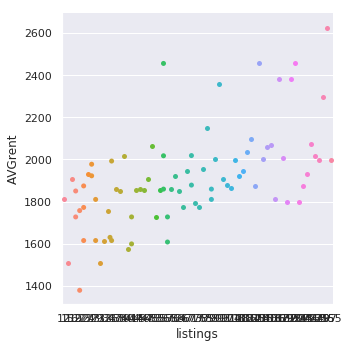

In [231]:
sns.catplot(x="listings", y="AVGrent", kind="swarm", data=dff);

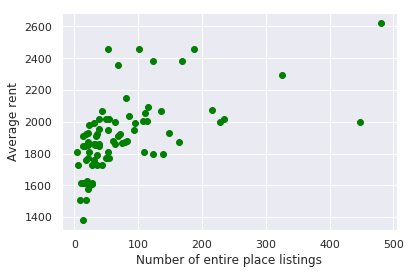

0.5733944895604494


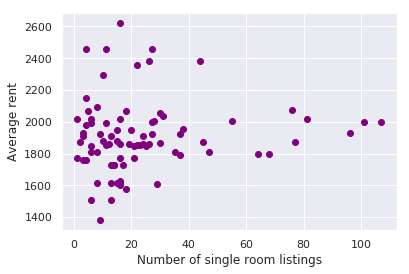

0.10044246358025356


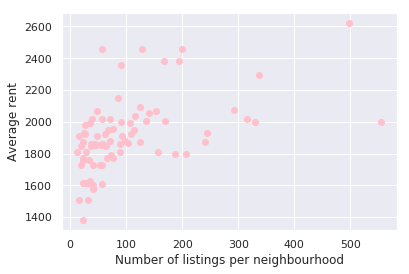

0.511366820678075


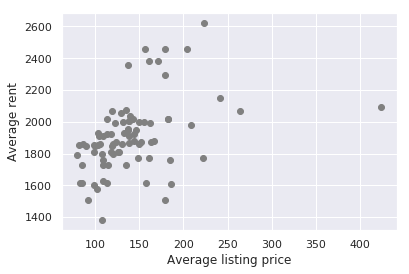

0.4247357629275412


In [232]:
plt.scatter(dff.entire, dff.AVGrent, color='green')
plt.xlabel("Number of entire place listings")
plt.ylabel("Average rent")
plt.show()
correlation = print(dff.entire.corr(dff.AVGrent, method="pearson"))

plt.scatter(dff.room, dff.AVGrent, color='purple')
plt.xlabel("Number of single room listings")
plt.ylabel("Average rent")
plt.show()
correlation = print(dff.room.corr(dff.AVGrent, method="pearson"))

plt.scatter(dff.listings, dff.AVGrent, color='pink')
plt.xlabel("Number of listings per neighbourhood")
plt.ylabel("Average rent")
plt.show()
correlation = print(dff.listings.corr(dff.AVGrent, method="pearson"))


plt.scatter(dff.AVGprice, dff.AVGrent, color='grey')
plt.xlabel("Average listing price")
plt.ylabel("Average rent")
plt.show()
correlation = print(dff.AVGprice.corr(dff.AVGrent, method="pearson"))


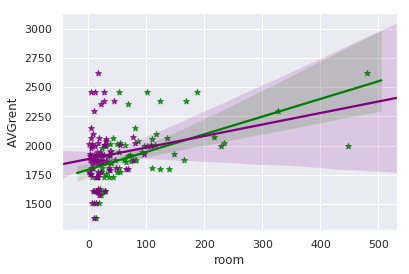

In [233]:
ax = sns.regplot(x = 'entire', y = 'AVGrent',
                 data = dff, 
                 color = 'green',
                 marker = '*')
ax2 = sns.regplot(x = 'room', y = 'AVGrent',
                 data = dff, 
                 color = 'purple',
                 marker = '*')

I then wanted to build a regression model to investigate the relationship between a the dependent variable (rent) and the predictor (listing type/density). The dataset was divided into two mutually exclusive sets for training (80%) and testing (20%) to provide a more accurate evaluation of out-of-sample accuracy. Based on the scatterplots above, it seems that a polynomial regression model would be more suitable for the current data.

In [234]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

df.fillna(0, inplace = True)
msk = np.random.rand(len(dff)) < 0.8
train = dff[msk]
test = dff[~msk]

train_x = np.asanyarray(train[['listings']])
train_y = np.asanyarray(train[['AVGrent']])

test_x = np.asanyarray(test[['listings']])
test_y = np.asanyarray(test[['AVGrent']])

Coefficients:  [[ 0.          2.74319388 -0.00344486]]
Intercept:  [1706.04574651]
Mean absolute error: 145.79
Residual sum of squares (MSE): 35359.04
R2-score: -1.81


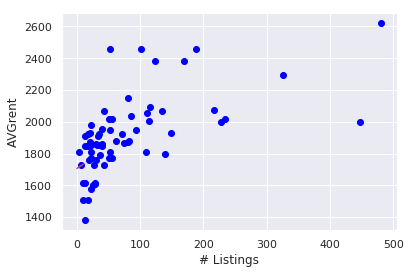

In [235]:
#Defining the power/degree of the polynomial features!
poly = PolynomialFeatures(degree= 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

#fit_transform takes our x values, and output a list of our data raised from power of 0 
#to power of 2 (since we set the degree of our polynomial to 2
# Polynomial regression is a special case of linear regression so we can use 
#the LinearRegression() function to solve it:

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

#Coefficient and Intercept , are the parameters of the fit curvy line. 
#Given that it is a typical multiple linear regression, with 3 parameters,
#and knowing that the parameters are the intercept and coefficients of hyperplane,
#sklearn has estimated them from our new set of feature sets. Here is the plot for it:

plt.scatter(train.entire, train.AVGrent,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("# Listings")
plt.ylabel("AVGrent")

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

In [289]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Defining X and y
X = np.asarray(df[['entire','room']])
X[0:5]

y = np.asarray(df['AVGrent'])
y [0:5]

#Normalizing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

#Predict yhat with the test set
yhat = LR.predict(X_test)
yhat

#predict_proba returns estimates for all classes, ordered by the label of classes.
#So, the first column is the probability of class 1, P(Y=1|X),
#and second column is probability of class 0, P(Y=0|X):

yhat_prob = LR.predict_proba(X_test)
yhat_prob

from sklearn.metrics import jaccard_similarity_score

print ('The Jaccard Similarity Score is')
jaccard_similarity_score(y_test, yhat)



Train set: (6520, 2) (6520,)
Test set: (1630, 2) (1630,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Jaccard Similarity Score is


0.06993865030674846

## Supervised clustering methods | KNN Clustering

The K-Nearest Neighbors algorithm is a classification algorithm that takes several labeled points and uses them to learn how to label other points.
- cases are classified based on their similarity to other cases.
- data points that are near each other are said to be neighbors
- similar cases with the same class labels are near each other.


In [290]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [238]:
dff.head()
dff.columns

Index(['neighbourhood', 'AVGrent', 'entire', 'room', 'AVGprice', 'AVGhostlist',
       'latitude', 'longitude', 'listings', 'host_num'],
      dtype='object')

1. Preparing the dataset

In [239]:
#To use scikit-learn we need to convert pandas df to a numpy array for both x and y
X = df[['AVGrent', 'id', 'entire', 'room', 'price', 'host_id',
       'calculated_host_listings_count']].values  #.astype(float)
X[0:5]

y = df['AVGrent'].values
y[0:5]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6520, 7) (6520,)
Test set: (1630, 7) (1630,)


2. Defining cluster # and labels

In [240]:
from sklearn.neighbors import KNeighborsClassifier

#set number of clusters

k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

# Evaluate accuracy

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
#Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

Train set Accuracy:  0.6041411042944785
Test set Accuracy:  0.42576687116564416


array([0.47546012, 0.42392638, 0.41840491, 0.41411043, 0.42576687,
       0.41779141, 0.41595092, 0.41226994, 0.40368098])

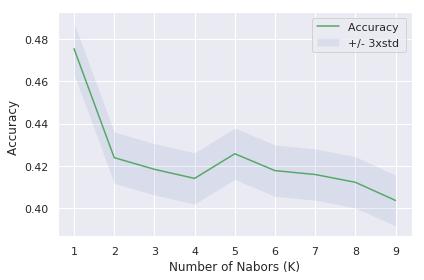

The best accuracy was with 0.4754601226993865 with k= 1


In [241]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


3. Examininig clusters

## Unsupervised clustering methods | k- Means
K-means can group unsupervised data; type of partitioning clustering producing sphere-like clusters
relatively efficient in Medium to Large size datasets

__Objectives of K-means__:  
- To form clusters in such a way that similar samples go into a cluster, and dissimilar samples fall into different clusters.
- To minimize the “intra cluster” distances and maximize the “inter-cluster” distances.
- To divide the data into non-overlapping clusters without any cluster-internal structure


In [242]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [243]:
dff.head()

,neighbourhood,AVGrent,entire,room,AVGprice,AVGhostlist,latitude,longitude,listings,host_num
0,Rainier View,1379,13,9,108.409091,6.227273,47.501127,-122.260339,22,18
1,South Park,1509,9,6,91.666667,10.733333,47.526723,-122.323792,15,15
2,Georgetown,1509,18,13,179.193548,7.612903,47.546307,-122.321056,31,23
3,Broadview,1574,22,18,102.000000,3.675000,47.718285,-122.359412,40,34
4,Bitter Lake,1599,25,16,99.414634,3.658537,47.718962,-122.351623,41,35


In [267]:
dfk = dff[['AVGrent','entire','room','listings','AVGprice']]
dfk.head()

,AVGrent,entire,room,listings,AVGprice
0,1379,13,9,22,108.409091
1,1509,9,6,15,91.666667
2,1509,18,13,31,179.193548
3,1574,22,18,40,102.000000
4,1599,25,16,41,99.414634


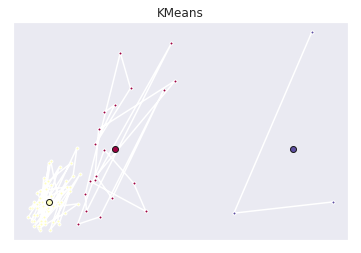

In [280]:
from sklearn.preprocessing import StandardScaler

X = dfk.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 15)

#Fitting the model with the feature matrix we created (X)
k_means.fit(X)

#Putting labels for each point in the model with the .labels_ attribute
k_means_labels = k_means.labels_
k_means_labels

#Getting coordinates of the cluster centers with .cluster_centers_
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 10)
k_means.fit(X)


# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


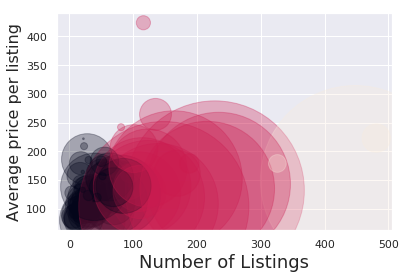

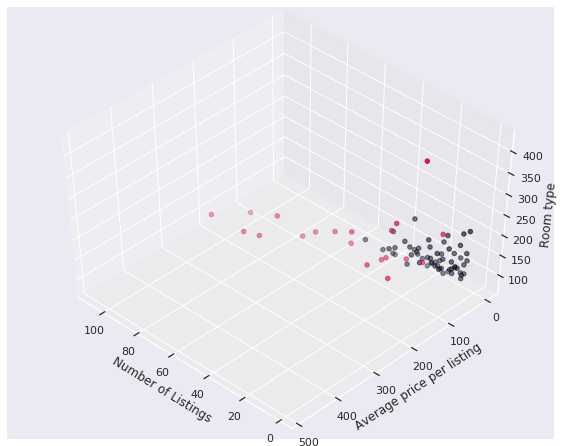

In [279]:

# Now let's assign labels to each row in the df
dfk["listings"] = labels


# Let's check the centroid values (averaging the features in each cluster)
dfk.groupby('AVGrent').mean()

# So what kind of distribution is it?
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.3)
plt.xlabel('Number of Listings', fontsize=18)
plt.ylabel('Average price per listing', fontsize=16)

plt.show()

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('Number of Listings')
ax.set_ylabel('Average price per listing')
ax.set_zlabel('Room type')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

## Unsupervised clustering methods | Density-based clustering DBSCAN
Most of the traditional clustering techniques (k-means, hierarchical and fuzzy clustering,etc) are used to group data without supervision. However, they do not perform as well in tasks with arbitrary shape clusters, or clusters within cluster.Density-based Clustering locates regions of high density that are separated from one another by regions of low density (i.e low number of points within a specified radius)

In [246]:
#Notice: For visualization of map, you need basemap package.
# if you dont have basemap install on your machine, you can use the following line to install it
#!conda install -c conda-forge  basemap==1.1.0  matplotlib==2.2.2  -y
# Notice: you maight have to refresh your page and re-run the notebook after installation

from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 


In [247]:
#turn df to numpy array
X = dff[['AVGrent', 'listings','entire','room','AVGprice','listings','host_num' ]].to_numpy()

#Min number of samples to form a cluster = 10
#Fitting the model
epsilon = 0.3
minimumSamples = 50
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

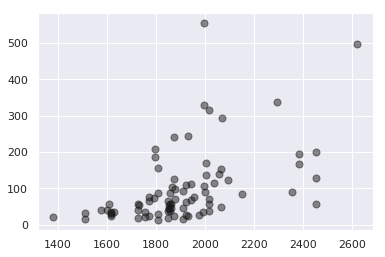

In [248]:
#First, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)


In [249]:
#!pip install --user git+https://github.com/matplotlib/basemap.git
##Visualization of clusters based on location
#import matplotlib.pyplot as plt
#from pylab import rcParams
#%matplotlib inline
#rcParams['figure.figsize'] = (14,10)
#my_map = Basemap(projection='merc',
#            resolution = 'l', area_thresh = 1000.0,
#            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
#            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

#my_map.drawcoastlines()
#my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
#my_map.shadedrelief()

# To create a color map
#colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))
#Visualization1
#for clust_number in set(labels):
#    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
#    clust_set = pdf[pdf.Clus_Db == clust_number]                    
#    my_map.scatter(clust_set.entire, clust_set.room, color =c,  marker='o', s= 20, alpha = 0.85)
#    if clust_number != -1:
#        cenx=np.mean(clust_set.entire) 
#        ceny=np.mean(clust_set.room) 
#        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
#        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

# Results & Discussion

The claim that Airbnb listings have an impact on increasing property rents is increasingly popular in media coverage in recent years. However, testing the available datasets for Seattle Airbnb listings and average rent showed there is only a moderate correlation between the number of entire houses/appartments taken off the market and listed on Airbnb and the likelihood of that neighbourhood having higher average rent. Attempts to build regression models and cluster neighbourhoods by numnber of listings, type of listing or average listing price and average rent in the neighbourhood did not indicate a robust  detect a robustist relationship between the predictor variables and the dependent variable (average rent per neighbourhood).

__Finding  no evidence__ that Airbnb listings impact rents __is not the same thing as finding evidence that they DO NOT impact rent__. It is, however, a good reminder that all claims should be empirically tested before we decide whether they are reliable or not. At this point, Seattle data seems to indicate that the impact of Airbnb listings is not as serious as some pundits claim. 

### Future research
Further analysis of similar Airbnbg listing datasets can further test the relationship between listings and rent property availability and average rent. Using datasets from other cities and comparing country-level and regional data can shed further light on the topic. What is more, further investigation should also take into account other factors influencing the market prices of properties and check what is their relative influence compared to that of Airbnb listings.

_Limitations_ This is a debut Python DataSci project, so it is possible that many components of its method and code would have to undergo further development.

# Conclusion

Some of the intuitive conclusions we reach by reading media coverage are not necessarily supported by data. Data Science technique in Python can help us analyse real-life data and test various hypotheses and predictions to see if facts support our initial intuitions.

_________________________